In [57]:
import csv

In [58]:
import pandas as pd

In [59]:
import numpy as np

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
df = pd.read_csv('Admission_Predict.csv')

In [62]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


<Axes: >

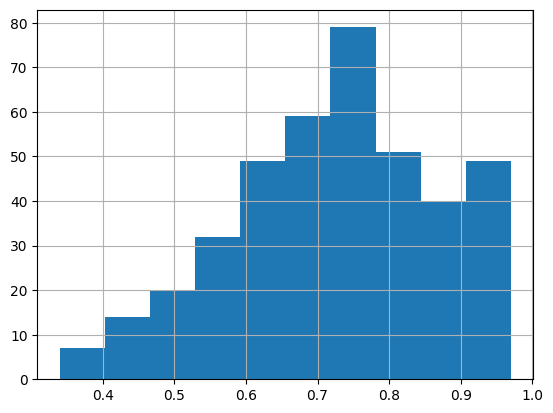

In [63]:
df['Chance of Admit '].hist()

In [64]:
df['Chance of Admit '].median()

0.73

In [65]:
df['Admit'] = df['Chance of Admit ']>0.73

In [66]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92,True
1,2,324,107,4,4.0,4.5,8.87,1,0.76,True
2,3,316,104,3,3.0,3.5,8.00,1,0.72,False
3,4,322,110,3,3.5,2.5,8.67,1,0.80,True
4,5,314,103,2,2.0,3.0,8.21,0,0.65,False
...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82,True
396,397,325,107,3,3.0,3.5,9.11,1,0.84,True
397,398,330,116,4,5.0,4.5,9.45,1,0.91,True
398,399,312,103,3,3.5,4.0,8.78,0,0.67,False


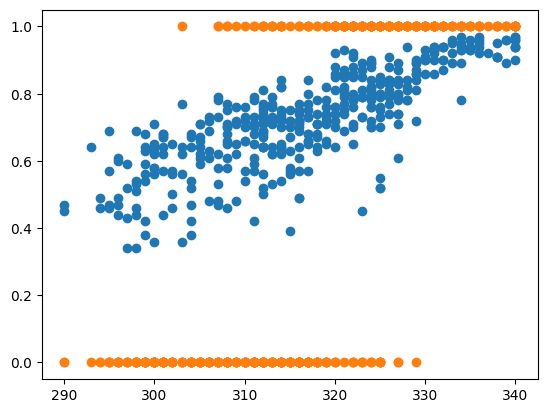

In [67]:
plt.scatter(df['GRE Score'],df['Chance of Admit '])
plt.scatter(df['GRE Score'],df['Admit'])

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [69]:
X = df['GRE Score'].to_numpy()[:,np.newaxis]
Y = df['Chance of Admit ']
Y = Y.values.reshape(-1, 1)

In [70]:
lr = LinearRegression()
LR = LogisticRegression()

In [71]:
lr.fit(X,Y)

LinearRegression()

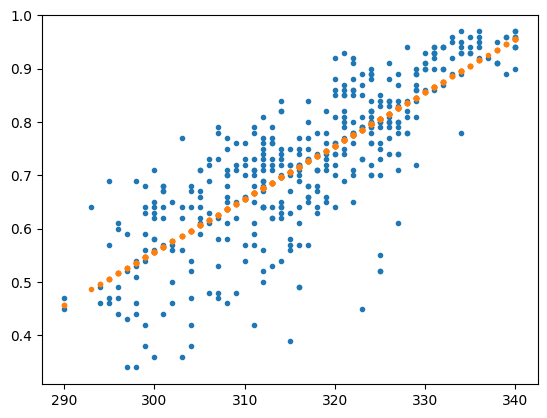

In [72]:
# This plot shows the nice linear regression fit between GRE score and Chance of admit

plt.plot(X,Y,'.')
plt.plot(X,lr.predict(X),'.')

In [73]:
#Instead of using linear regression now do logistic regression on target output classes of Admit
Y = df['Admit']
Y = Y.values

In [74]:
Y.shape

(400,)

In [75]:
LR.fit(X,Y)

LogisticRegression()

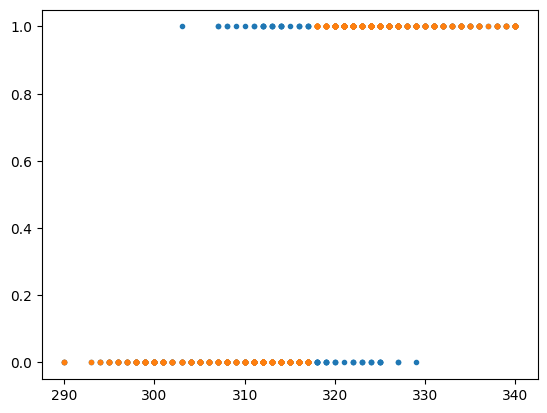

In [76]:
# this is the Logistic Regression prediction (along with ground truth)
plt.plot(X,Y,'.')
plt.plot(X,LR.predict(X),'.')

In [77]:
df.keys()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ', 'Admit'],
      dtype='object')

### Q1
``` A. Use 4 features from above to set up your data matrix X. These 4 features should in your opinion best predict Admit decision (4 pts)
B. Split X, Y into train, val, test (2 pts) 
C. Scale and Augment X appropriately (4 pts)```

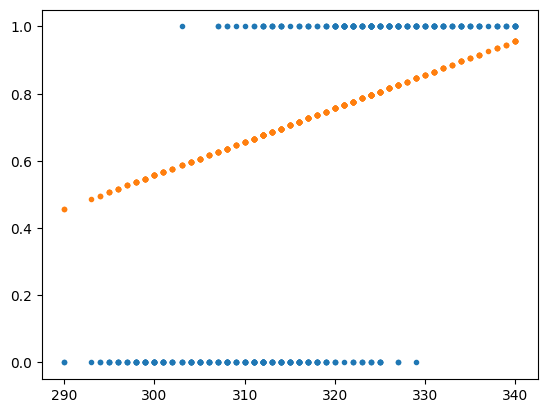

In [78]:

plt.plot(X,Y,'.')
plt.plot(X,lr.predict(X),'.')

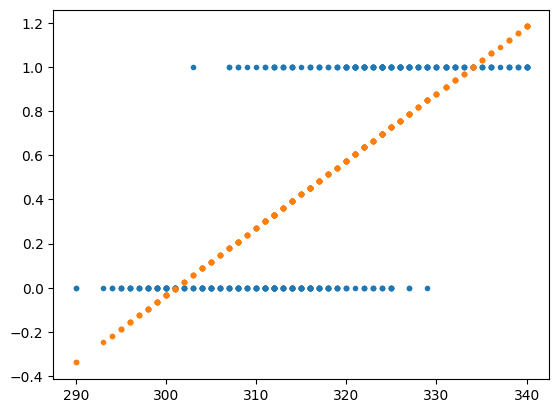

In [79]:

X1 = df['GRE Score'].to_numpy()[:,np.newaxis]
lr.fit(X1,Y)
plt.plot(X1,Y,'.')
plt.plot(X1,lr.predict(X1),'.')

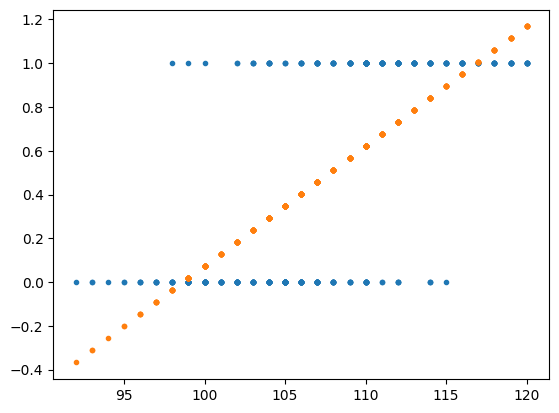

In [80]:
X2 = df['TOEFL Score'].to_numpy()[:,np.newaxis]
lr.fit(X2,Y)
plt.plot(X2,Y,'.')
plt.plot(X2,lr.predict(X2),'.')

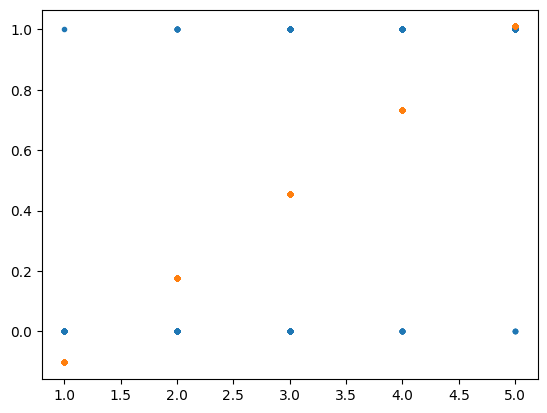

In [81]:
X3 = df['University Rating'].to_numpy()[:,np.newaxis]
lr.fit(X3,Y)
plt.plot(X3,Y,'.')
plt.plot(X3,lr.predict(X3),'.')

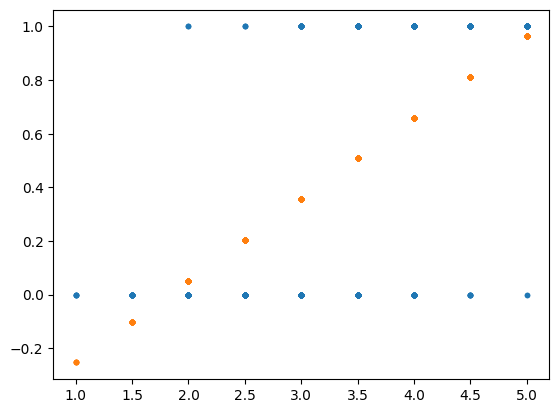

In [82]:

X4 = df['SOP'].to_numpy()[:,np.newaxis]
lr.fit(X4,Y)
plt.plot(X4,Y,'.')
plt.plot(X4,lr.predict(X4),'.')

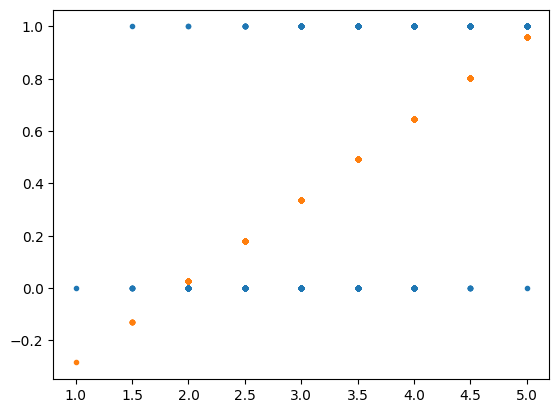

In [83]:
X5 = df['LOR '].to_numpy()[:,np.newaxis]
lr.fit(X5,Y)
plt.plot(X5,Y,'.')
plt.plot(X5,lr.predict(X5),'.')

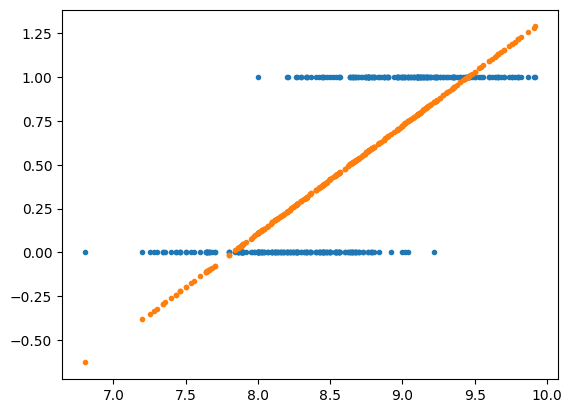

In [84]:
X6 = df['CGPA'].to_numpy()[:,np.newaxis]
lr.fit(X6,Y)
plt.plot(X6,Y,'.')
plt.plot(X6,lr.predict(X6),'.')

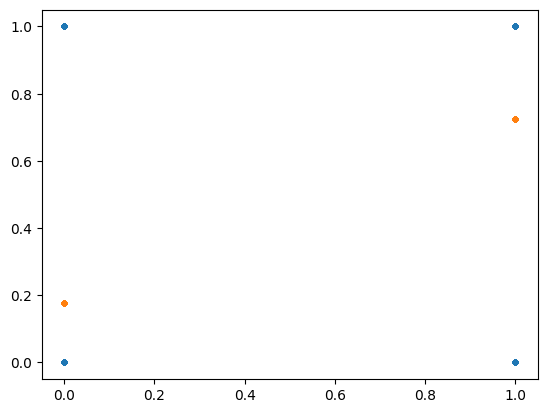

In [85]:
X7 = df['Research'].to_numpy()[:,np.newaxis]
lr.fit(X7,Y)
plt.plot(X7,Y,'.')
plt.plot(X7,lr.predict(X7),'.')

In [86]:
X = df.filter(['GRE Score', 'TOEFL Score', 'CGPA',
                  'SOP'], axis = 1)

def train_val_test_split(X, Y):
    p = np.random.permutation(len(Y))
    tr = np.floor(len(Y)*0.7).astype('int')
    te = np.floor(len(Y)*0.8).astype('int')
    X_train = X[p[:tr],:]
    Y_train = Y[p[:tr]]
    X_val = X[p[tr+1:te],:]
    Y_val = Y[p[tr+1:te]]
    X_test = X[p[te+1:],:]
    Y_test = Y[p[te+1:]]
    return X_train, Y_train, X_val, Y_val, X_test, Y_test 

In [87]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = train_val_test_split(X.to_numpy(),Y)

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# add a column of ones to X for the bias term
X_aug_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_aug_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_aug_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

In [89]:
print(len(X_train), len(Y_train), len(X_val), len(Y_val), len(X_test), len(Y_test))

280 280 39 39 79 79


In [90]:
X_val.shape

(39, 4)

In [91]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def compute_cross_entropy_loss(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((~y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

def predict(X, params):
    return np.round(sigmoid(X @ params))





In [92]:
random_predictions = np.round(np.random.rand(*Y_val.shape))
random_predictions.shape

(39,)

In [93]:
Y_val.shape 

(39,)

In [94]:
X_val.shape

(39, 4)

### Q2
``` Report cross entropy loss for a random prediction of Y_val and for predictions from LR.predict(X_val) (5 pts)```

In [95]:
np.random.seed(42)  # for reproducibility
n = len(Y_val)
k = np.unique(Y_val).size
random_pred = np.random.rand(n, k)
random_pred /= random_pred.sum(axis=1, keepdims=True)

onehot_Y_val = np.zeros((n, k))
onehot_Y_val[np.arange(n), np.clip(Y_val, 0, k-1)] = 1

random_ce_loss = -(onehot_Y_val * np.log(random_pred)).sum() / n
print(random_ce_loss)

1.132805325911814


In [96]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [97]:
def init(X,zeros=True):
    n = X.shape[1]
    if zeros:
        theta = np.zeros((n,1))
    else:
        theta = np.random.rand(n,1)-0.5
        theta[-1] = 0
    return theta

In [98]:
# This is batch gradient descent that updates using all training samples
def update_weights( X, Y,  theta ) :
             
        # Y_pred = predict(X, theta)  
        # calculate gradients  
        m = X.shape[0]
        dtheta = - ( 2 * ( X.T ).dot( Y - sigmoid(np.matmul(X,theta)) )  ) / m
        cost_history = compute_cross_entropy_loss(X, Y, dtheta)  
        return dtheta,cost_history

In [99]:
theta = init(X_val)
dtheta, cost_h = update_weights(X_val, Y_val, theta)


In [100]:
cost_h

array([ 0.16252229,  0.16252229, -0.16252229,  0.16252229, -0.16252229,
        0.16252229,  0.16252229,  0.16252229,  0.16252229,  0.16252229,
        0.16252229, -0.16252229, -0.16252229,  0.16252229,  0.16252229,
       -0.16252229,  0.16252229,  0.16252229, -0.16252229, -0.16252229,
        0.16252229, -0.16252229, -0.16252229, -0.16252229,  0.16252229,
        0.16252229,  0.16252229, -0.16252229,  0.16252229, -0.16252229,
        0.16252229,  0.16252229, -0.16252229, -0.16252229, -0.16252229,
        0.16252229, -0.16252229,  0.16252229,  0.16252229])

In [101]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)

LogisticRegression()

In [102]:
y_pred = LR.predict(X_val)

In [103]:
y_pred

array([False,  True, False,  True, False,  True,  True, False, False,
        True,  True, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False,  True,  True, False,  True,
       False,  True, False,  True, False, False,  True, False,  True,
       False,  True,  True])

In [104]:
dtheta, cost_h = update_weights(X_val, y_pred, theta)
cost_h

array([-0.18762818,  0.18762818, -0.18762818,  0.18762818, -0.18762818,
        0.18762818,  0.18762818, -0.18762818, -0.18762818,  0.18762818,
        0.18762818, -0.18762818, -0.18762818, -0.18762818,  0.18762818,
        0.18762818,  0.18762818,  0.18762818, -0.18762818, -0.18762818,
       -0.18762818, -0.18762818, -0.18762818,  0.18762818,  0.18762818,
       -0.18762818,  0.18762818, -0.18762818,  0.18762818, -0.18762818,
        0.18762818, -0.18762818, -0.18762818,  0.18762818, -0.18762818,
        0.18762818, -0.18762818,  0.18762818,  0.18762818])

In [105]:
y_rand = np.random.rand(*Y_val.shape)
y_rand = y_rand >= 0.5
dtheta, cost_h = update_weights(X_val, y_rand, theta)
cost_h

array([ 0.05322905,  0.05322905, -0.05322905, -0.05322905,  0.05322905,
        0.05322905,  0.05322905,  0.05322905, -0.05322905, -0.05322905,
       -0.05322905,  0.05322905,  0.05322905, -0.05322905, -0.05322905,
       -0.05322905, -0.05322905,  0.05322905, -0.05322905,  0.05322905,
        0.05322905,  0.05322905,  0.05322905, -0.05322905,  0.05322905,
       -0.05322905, -0.05322905,  0.05322905,  0.05322905, -0.05322905,
        0.05322905,  0.05322905,  0.05322905,  0.05322905, -0.05322905,
       -0.05322905, -0.05322905, -0.05322905, -0.05322905])

### Q3 
``` Implement an iterative method that at each iterations selects a random theta and if this theta improves cross_entropy_loss keeps the theta, else discards the theta. plot the cross_entropy loss history (over iterations for X_val) with this method. (10 pts)```
### Bonus
``` Implement an iterative method that at each iterations gets a random *dtheta* and if  theta+learning_rate*dtheta improves cross_entropy_loss it updates  theta with dtheta, else discards dtheta. plot the cross_entropy loss history (over iterations for X_val) with this method. (10 pts)```

In [106]:
def random_search(X_train, y_train, X_val, y_val, max_iter):
    m, n = X_train.shape
    theta = np.zeros((n, 1))
    history = []
    best_loss = float('inf')
    for i in range(max_iter):
        new_theta = np.random.rand(n, 1)
        new_loss = compute_cross_entropy_loss(X_val, y_val, new_theta)
        if new_loss < best_loss:
            best_loss = new_loss
            theta = new_theta
        history.append(best_loss)
    return theta, history


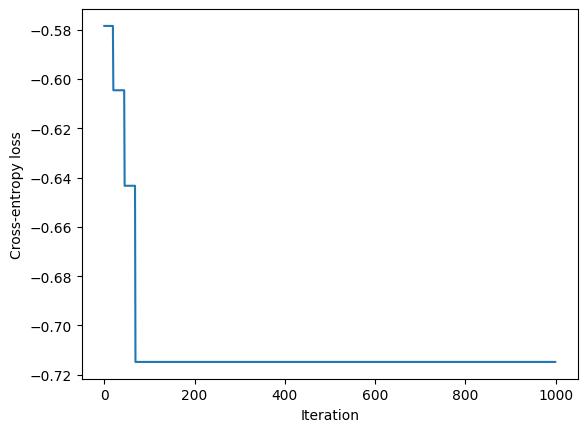

In [113]:
best_theta, loss_history = random_search(X_train, Y_train, X_val, Y_val, 1000)
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Cross-entropy loss')
plt.show()

In [108]:
def gradient_descent(X_train, y_train, X_val, y_val, learning_rate, max_iter):
    m, n = X_train.shape
    theta = np.zeros((n, 1))
    history = []
    best_loss = float('inf')
    for i in range(max_iter):
        dtheta = np.random.randn(n, 1)
        new_theta = theta + learning_rate * dtheta
        new_loss = compute_cross_entropy_loss(X_val, y_val, new_theta)
        if new_loss < best_loss:
            best_loss = new_loss
            theta = new_theta
        history.append(best_loss)
    return theta, history

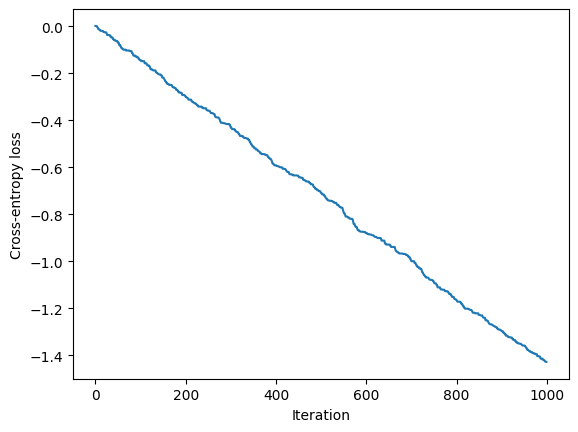

In [109]:
learning_rate = 0.01
max_iter = 1000
best_theta, loss_history = gradient_descent(X_train, Y_train, X_val, Y_val, learning_rate, max_iter)
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Cross-entropy loss')
plt.show()

### Q4

``` From Lab1 get the gradient descent  -- update over entire training sample, update over a  sample, update over a batch of sample -- that worked best for you. Also play with learning rate to get to the best cross_entropy_loss.  plot the cross_entropy loss history (over iterations for X_val) with this method. (20 pts)```

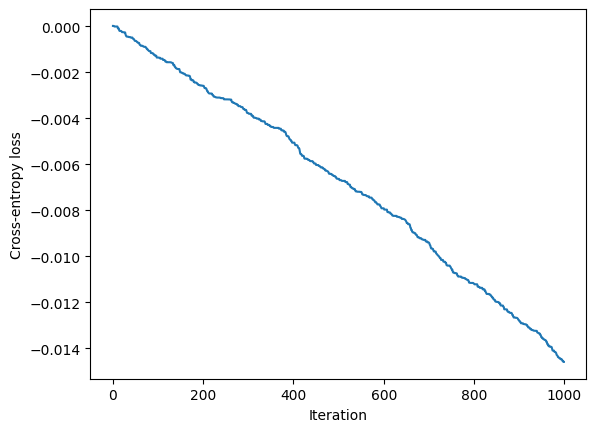

In [110]:
# Run gradient descent over the entire training sample

def gradient_descent(X_train, y_train, X_val, y_val, learning_rate, max_iter):
    m, n = X_train.shape
    theta = np.zeros((n, 1))
    history = []
    best_loss = float('inf')
    for i in range(max_iter):
        dtheta = np.random.randn(n, 1)
        new_theta = theta + learning_rate * dtheta
        new_loss = compute_cross_entropy_loss(X_val, y_val, new_theta)
        if new_loss < best_loss:
            best_loss = new_loss
            theta = new_theta
        history.append(best_loss)
    return theta, history

learning_rate = 0.0001
max_iter = 1000
best_theta, loss_history = gradient_descent(X_train, Y_train, X_val, Y_val, learning_rate, max_iter)
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Cross-entropy loss')
plt.show()

$l(x_i) =  max(0,1-y_i\theta x_i)$ ```with the assumption that y_i = {+1, -1}```

``` if y_i and \theta x_i have same sign and |\theta x_i| is larger than one, loss will be zero. That is prediction matches label and prediction has magnitude greater than one there is no loss. If prediction and label have opposite sign, loss will be greater than zero -- incorrect prediction there is a loss. There is also a loss if magnitude of prediction is less than zero even if they have the same sign. Hinge loss wants correct and incorrect classification to have a margin of atleast one. ```

### Q5
Implement Hinge loss and use random search method in Q3 to reduce loss and find a better theta. plto the hinge loss history (over iterations for X_val) with this method. (10 pts)
### Bonus
```
Implement SGD update rule for hinge loss by first find derivative of hinge loss over theta. Use SGD to optimize hinge loss. plot the hinge loss history (over iterations for X_val) with this method. 
```

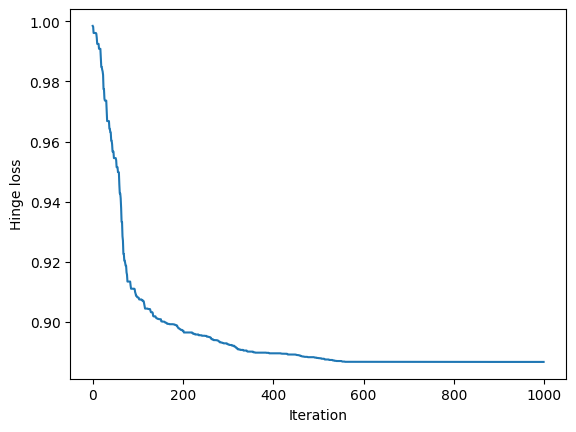

In [111]:
def hinge_loss(X, y, theta):
    m = len(y)
    h = X @ theta
    loss = np.maximum(0, 1 - y * h)
    return np.mean(loss)

def gradient_descent(X_train, y_train, X_val, y_val, learning_rate, max_iter):
    m, n = X_train.shape
    theta = np.zeros((n, 1))
    history = []
    best_loss = float('inf')
    for i in range(max_iter):
        dtheta = np.random.randn(n, 1)
        new_theta = theta + learning_rate * dtheta
        new_loss = hinge_loss(X_val, y_val, new_theta)
        if new_loss < best_loss:
            best_loss = new_loss
            theta = new_theta
        history.append(best_loss)
    return theta, history

learning_rate = 0.01
max_iter = 1000
best_theta, loss_history = gradient_descent(X_train, Y_train, X_val, Y_val, learning_rate, max_iter)
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Hinge loss')
plt.show()

In [112]:
def hinge_loss(y, X, theta):
    return np.maximum(0, 1 - y * (X @ theta))

def hinge_loss_grad(X, y, theta):
    margin = y * (X @ theta)
    grad = np.zeros(theta.shape)
    grad[margin < 1] = -y[margin < 1, None] * X[margin < 1]
    return grad.mean(axis=0)

def sgd_hinge(X_train, Y_train_hinge, X_val, Y_val_hinge, alpha=0.01, epochs=100):
    theta = np.zeros((X_train.shape[1], 1))
    train_loss_hist = []
    val_loss_hist = []
    num_train = X_train.shape[0]
    num_val = X_val.shape[0]
    N_train = X_train.shape[0]

    for epoch in range(epochs):
      for i in range(N_train):
        # Get the next random data point
        idx = perm_indices[i]
        x = X_train[idx]
        y = y_train[idx]

        # Compute the hinge loss and its gradient
        loss, grad = hinge_loss_grad(x, y, w)

        # Update the weight vector using SGD
        w -= learning_rate * grad

    # Shuffle the training set for the next epoch
      perm_indices = np.random.permutation(N_train)

    # Compute the validation loss
      val_loss = hinge_loss(X_val, Y_val, w)

    # Store the validation loss history
      val_loss_history.append(val_loss)

    return theta, train_loss_hist, val_loss_hist

theta, train_loss_history, val_loss_history = sgd_hinge(X_train, Y_train, X_val, Y_val, alpha=0.01, epochs=100)

# plot loss history
plt.plot(train_loss_history, label='train')
plt.plot(val_loss_history, label='val')
plt.xlabel('Epoch')
plt.ylabel('Hinge Loss')
plt.legend()
plt.show()

UnboundLocalError: local variable 'perm_indices' referenced before assignment

### Q6

```  In this problem you will create your own target function f (probability in this case) and data set D to see how Logistic Regression works. For simplicity, we will take f to be a 0/1 probability so y is a deterministic function of x. Take n = 2 so you can visualize the problem, and let X = [−1, 1]×[−1, 1] with uniform probability of picking each x ∈ X . Choose a line in the plane as the boundary between f(x) = 1 (where y has to be +1) and f(x) = 0 (where y has to be −1) by taking two random, uniformly distributed points from X and taking the line passing through them as the boundary between y = ±1. Pick m = 100 training points at random from X, and evaluate the outputs y_m for each of these points x_m.```

```
Run Logistic Regression with Stochastic Gradient Descent to find g, and estimate E_out (the cross entropy error) by generating a sufficiently large, separate set of points to evaluate the error. Repeat the experiment for 100 runs with different targets and take the average. Initialize the weight vector of Logistic Regression to all zeros in each run. Stop the algorithm when ∥w(t−1) − w(t)∥ < 0.01, where w(t) denotes the weight vector at the end of epoch t. An epoch is a full pass through the N data points (use a random permutation of 1, 2, · · · , N to present the data points to the algorithm within each epoch, and use different permutations for different epochs). Use a learning rate of 0.01.
```

In [ ]:
def f(x):
    """
    Target function to classify the points above or below a random line
    """
    # Generate a random line between two points
    point1 = (-1, -1)
    point2 = (1, 1)
    a = (point2[1] - point1[1]) / (point2[0] - point1[0])
    b = point1[1] - a * point1[0]
    
    # Evaluate the output y based on the position of x with respect to the line
    if x[1] > a * x[0] + b:
        return 1
    else:
        return -1

m = 100
X = np.random.uniform(low=-1, high=1, size=(m, 2))

# Evaluate the output y for each point in X using the target function f
y = np.array([f(x) for x in X])

plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker='o', color='b', label='y=+1')
plt.scatter(X[:, 0][y == -1], X[:, 1][y == -1], marker='x', color='r', label='y=-1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [ ]:
# Define the weight vector
w = np.zeros(3)

# Define the learning rate
lr = 0.01

# Define the stopping criterion
epsilon = 0.01

# Define the number of epochs
epochs = 100

# Define the number of training points
m = 100

# Define the number of test points
test_size = 10000

# Define the number of runs
runs = 100

# Define the cross-entropy error
ce_error = np.zeros(runs)

# Repeat for each run
for r in range(runs):
    # Generate the training data
    X_train = np.random.uniform(-1, 1, size=(m, 2))
    y_train = np.sign((X_train[:, 1] - X_train[:, 0]) * (np.random.uniform() * 2 - 1))
    X_train = np.hstack((np.ones((m, 1)), X_train))
    
    # Generate the test data
    X_test = np.random.uniform(-1, 1, size=(test_size, 2))
    y_test = np.sign((X_test[:, 1] - X_test[:, 0]) * (np.random.uniform() * 2 - 1))
    X_test = np.hstack((np.ones((test_size, 1)), X_test))
    
    # Perform stochastic gradient descent
    for epoch in range(epochs):
        # Randomize the order of the training points
        perm = np.random.permutation(m)
        X_train = X_train[perm, :]
        y_train = y_train[perm]
        
        # Iterate over the training points
        for i in range(m):
            # Compute the sigmoid function and its gradient
            sig = 1 / (1 + np.exp(-y_train[i] * X_train[i, :].dot(w)))
            grad = (-y_train[i] * sig) * X_train[i, :]
            
            # Update the weight vector
            w_new = w - lr * grad
            
            # Check the stopping criterion
            if np.linalg.norm(w_new - w) < epsilon:
                w = w_new
                break
            
            w = w_new
    
    # Compute the cross-entropy error
    ce_error[r] = np.mean(np.log(1 + np.exp(-y_test * X_test.dot(w))))
    
# Compute the average cross-entropy error
avg_ce_error = np.mean(ce_error)

print(avg_ce_error)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter values
n = 0.03  # Population growth rate
delta = 0.07  # Depreciation rate
s = 0.2  # Savings rate
A = 1  # Technology level

# Production function
def Y(K, L):
    return A * (K ** 0.5) * (L ** 0.5)

# Capital accumulation equation
def K_dot(K, L):
    return s * Y(K, L) - delta * K

# Plotting the Solow model diagram
fig, ax = plt.subplots(figsize=(8, 6))

# Capital grid
k_grid = np.linspace(0, 100, 1000)
ax.plot(k_grid, Y(k_grid, 1), 'b-', lw=2, alpha=0.8)

# Steady state level of capital per worker
k_star = ((s * A) / (delta + n)) ** 2
y_star = Y(k_star, 1)
c_star = (1 - s) * y_star

# Initial level of capital per worker
k0 = k_star / 2
y0 = Y(k0, 1)
c0 = (1 - s) * y0

# Transition path to new steady state
T = 20
k_path = np.zeros(T)
y_path = np.zeros(T)
c_path = np.zeros(T)
k_path[0] = k0
y_path[0] = y0
c_path[0] = c0
for t in range(1, T):
    k_path[t] = K_dot(k_path[t-1], 1) + k_path[t-1]
    y_path[t] = Y(k_path[t], 1)
    c_path[t] = (1 - s) * y_path[t]

# Plotting the transition path
ax.plot(k_path, y_path, 'g-', lw=2, alpha=0.8)

# Plotting the initial steady state
ax.plot(k0, y0, 'ro', ms=10)
ax.annotate('Initial Steady State', xy=(k0, y0), xytext=(k0+10, y0-5), fontsize=12,
            arrowprops=dict(facecolor='black', shrink=0.05))

# Plotting the new steady state
ax.plot(k_star, y_star, 'ro', ms=10)
ax.annotate('New Steady State', xy=(k_star, y_star), xytext=(k_star-30, y_star+10), fontsize=12,
            arrowprops=dict(facecolor='black', shrink=0.05))

# Setting plot parameters
ax.set_xlabel('Capital per Worker')
ax.set_ylabel('Output per Worker')
ax.set_xlim([0, 100])
ax.set_ylim([0, 10])
ax.set_title('Solow Model Diagram with Transition to New Steady State')

plt.show()